In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data_set
haberman_df = pd.read_csv('haberman.csv', names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_5yr'
])
#viewing sample of data
haberman_df.head()

,age,year_of_treatment,positive_lymph_nodes,survival_5yr
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
haberman_df.describe()

,age,year_of_treatment,positive_lymph_nodes,survival_5yr
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
haberman_df.columns

Index(['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_5yr'], dtype='object')

In [5]:
haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   306 non-null    int64
 1   year_of_treatment     306 non-null    int64
 2   positive_lymph_nodes  306 non-null    int64
 3   survival_5yr          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
haberman_df.survival_5yr.value_counts()

1    225
2     81
Name: survival_5yr, dtype: int64

**Considering survival = 1 and not-survived = 2**

In [8]:
haberman_df['survived'] = 'Yes'

In [9]:
haberman_df['survived'][haberman_df.survival_5yr==1] = 'Yes'
haberman_df['survived'][haberman_df.survival_5yr==2] = 'No'
haberman_df.head()

C:\Users\NIKHIL\AppData\Local\Temp/ipykernel_10024/193066914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haberman_df['survived'][haberman_df.survival_5yr==1] = 'Yes'
C:\Users\NIKHIL\AppData\Local\Temp/ipykernel_10024/193066914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haberman_df['survived'][haberman_df.survival_5yr==2] = 'No'


,age,year_of_treatment,positive_lymph_nodes,survival_5yr,survived
0,30,64,1,1,Yes
1,30,62,3,1,Yes
2,30,65,0,1,Yes
3,31,59,2,1,Yes
4,31,65,4,1,Yes


In [10]:
haberman_df.survived.value_counts()

Yes    225
No      81
Name: survived, dtype: int64

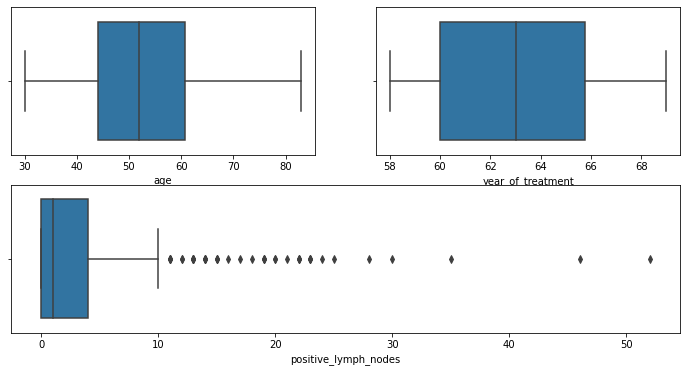

In [11]:
#ploting univariate box plot to see data distribution
plt.figure(figsize=[12,6])
plt.subplot(2,2,1)
sns.boxplot(data=haberman_df,x='age')
plt.subplot(2,2,2)
sns.boxplot(data=haberman_df,x='year_of_treatment')
plt.subplot(2,2,(3,4))
sns.boxplot(data=haberman_df,x='positive_lymph_nodes')
plt.show()

<Figure size 1440x1440 with 0 Axes>

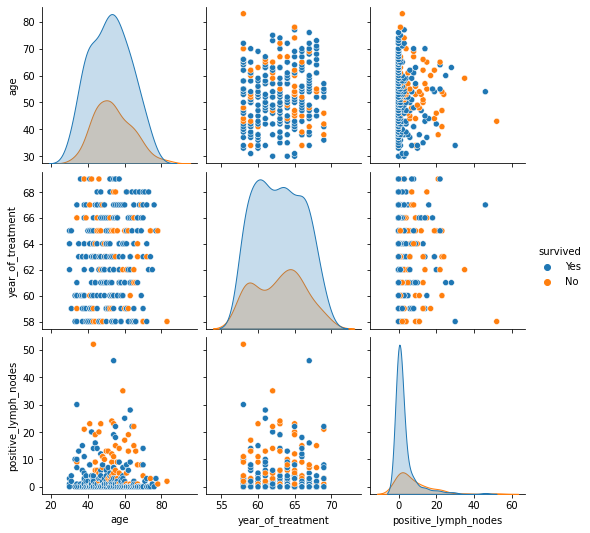

In [12]:
plt.figure(figsize=[20,20])
sns.pairplot(vars=['age', 'year_of_treatment', 'positive_lymph_nodes'],data=haberman_df,hue='survived')
plt.show()

<AxesSubplot:xlabel='positive_lymph_nodes', ylabel='count'>

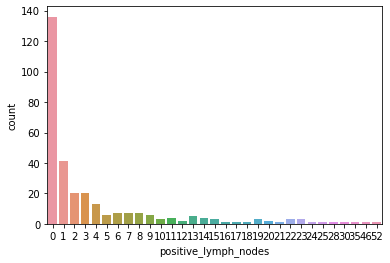

In [13]:
sns.countplot(x='positive_lymph_nodes',data=haberman_df)

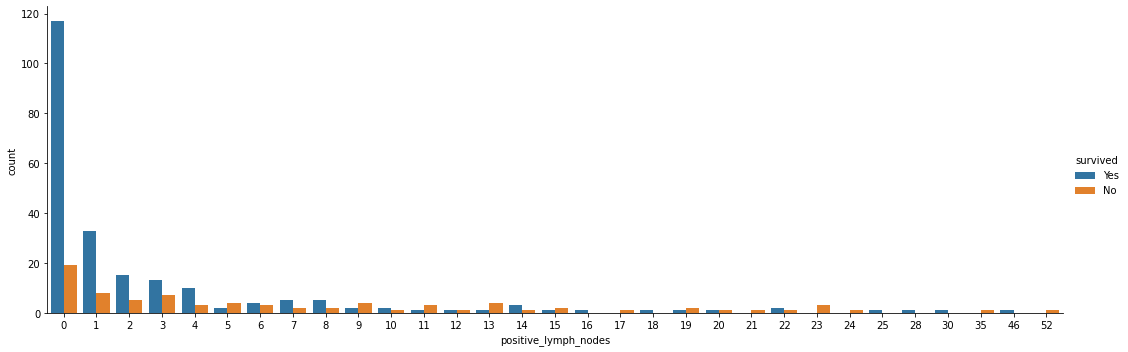

In [29]:
sns.catplot(x='positive_lymph_nodes',data=haberman_df,hue='survived',kind='count',aspect=3)

In [33]:
survival_5lymph = haberman_df[haberman_df.positive_lymph_nodes >= 5].survived=='No'
survival_5lymph.value_counts()

True     39
False    37
Name: survived, dtype: int64

In [34]:
survival_less_5lymph = haberman_df[haberman_df.positive_lymph_nodes < 5].survived=='No'
survival_less_5lymph.value_counts()

False    188
True      42
Name: survived, dtype: int64

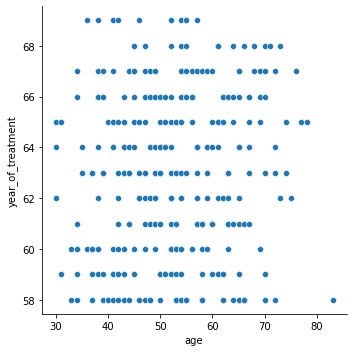

In [35]:
sns.relplot(x='age',y ='year_of_treatment',data=haberman_df)

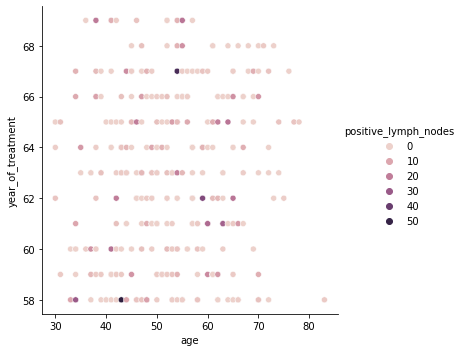

In [36]:
sns.relplot(x='age',y ='year_of_treatment',data=haberman_df,hue='positive_lymph_nodes')

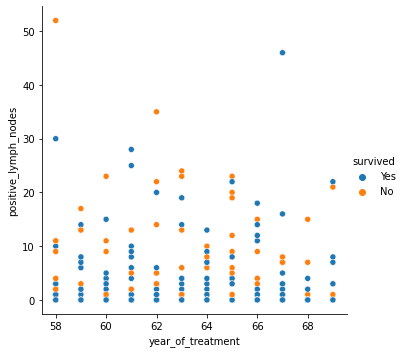

In [37]:
sns.relplot(x='year_of_treatment',y='positive_lymph_nodes',hue='survived',data=haberman_df)

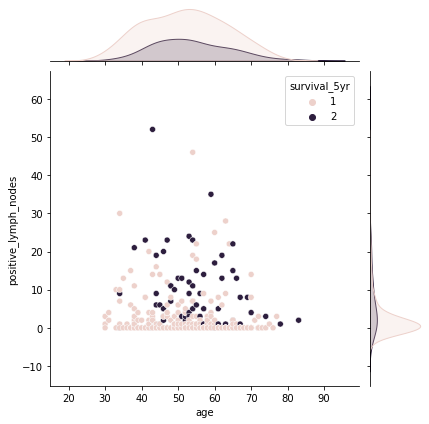

In [38]:
sns.jointplot(x= 'age',y='positive_lymph_nodes',data=haberman_df,hue='survival_5yr')

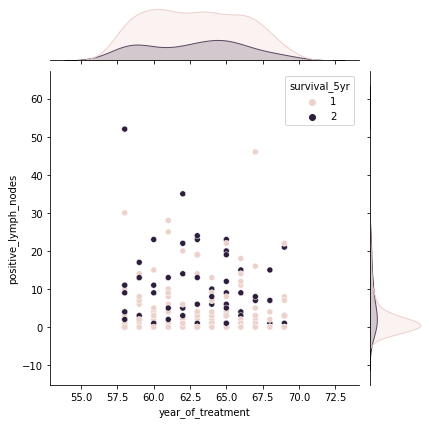

In [39]:
sns.jointplot(x= 'year_of_treatment',y='positive_lymph_nodes',data=haberman_df,hue='survival_5yr')

## From above vizualization we can say that:-
* As the No. of positive lymph nodes increases the survival chances decreases.
* Also, we can see that the #lymph nodes is lower than 5 and more concentrated. 
* Hence, the non-survival cases are more of the outliers from lymph nodes(only 50% survival rate).
* The year of treatment doesn't seem to have effect on Survival rate.


 the data is imbalanced and most have no lymph nodes, the above conclusions can be said rough counclusions.